# Stemming with NLTK


After stop words are removed from sentences, the next step in data preprocessing pertains to **stemming**. Stemming is the process of reducing words (or tokens) to their root form by removing things like suffixes, prefixes, or other word affixes. This reduction of a word to its stem allows for easier comparison of words and their respective meanings.

There are several stemming techniques, in this notebook we're leveraging `NLTK`'s `PorterStemmer()`. Read more about the details [here](https://www.nltk.org/api/nltk.stem.porter.html?highlight=porter+stemmer#nltk.stem.porter.PorterStemmer)

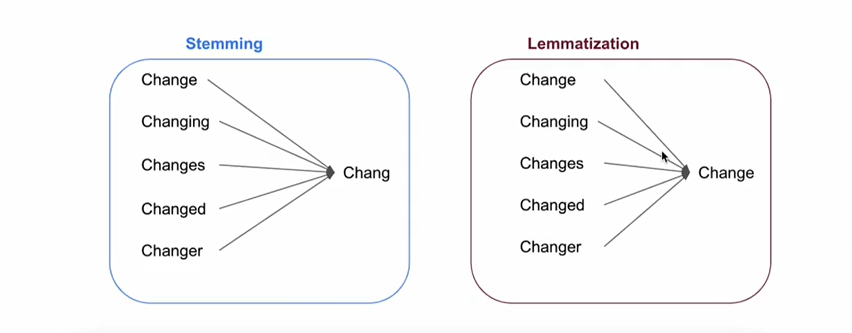

In [1]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pprint

In [2]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kaila\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kaila\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
# Instantiate porter stemmer

port_stemmer = PorterStemmer()

In [4]:
# Stemming similar words 

words = ["run", "running", "runs", "runner", "runners"]

for w in words:
    pprint.pprint(f"{w}: {port_stemmer.stem(w)}")

'run: run'
'running: run'
'runs: run'
'runner: runner'
'runners: runner'


## Tokenizing and Stemming Multiple Sentences 

Building on the simple example above, let's take a look stemming a longer corpus. In order to apply the `PorterStemmer()`, the corpus will first need to be tokenized:

In [5]:
# Stemming several sentences 
from nltk.tokenize import word_tokenize

corpus = "Boston Marathon runners run the race by running 26.2 miles."

# Tokenize first 
words = word_tokenize(corpus)

# Apply the stemmer 
for w in words:
    pprint.pprint(f"{w}: {port_stemmer.stem(w)}")

'Boston: boston'
'Marathon: marathon'
'runners: runner'
'run: run'
'the: the'
'race: race'
'by: by'
'running: run'
'26.2: 26.2'
'miles: mile'
'.: .'


# Lemmatization with NLTK

Somewhat related to stemming is **lemmatization** which is the process that groups together different inflected forms of a word so they can be analyzed as a single item. For example, in the lemmatization step the words “run”, “ran”, and “running” would all be converted into the base form, “run.”

Similar to stemming, there are several techniques for lemmatization. In this example, we'll us the `WordNetLemmatizer()` from `NLTK`. Since lemmatization depends on the part of speech, the `WordNetLemmatizer()` accepts a `pos` argument to denote the part of speech. Read more about the `WordNetLemmatizer` [here](https://www.nltk.org/api/nltk.stem.wordnet.html?highlight=lemmatizer#nltk.stem.wordnet.WordNetLemmatizer)

In [10]:
from nltk.stem import WordNetLemmatizer

word_net_lemmatizer = WordNetLemmatizer()

# Single word examples of lemmatizing 
print("runs: ", word_net_lemmatizer.lemmatize("runs", pos="v"))
print("runs: ", word_net_lemmatizer.lemmatize("runs", pos="n"))
print("running: ", word_net_lemmatizer.lemmatize("running", pos="v"))
print("running: ", word_net_lemmatizer.lemmatize("running", pos="a"))

# Note that the part of speech matters for lemmatizing 
print(f"better: ", word_net_lemmatizer.lemmatize("better", pos="a"))
print(f"better: ", word_net_lemmatizer.lemmatize("better"))

runs:  run
runs:  run
running:  run
running:  running
better:  good
better:  better


### Tokenizing and Lemmatizing Sentences 

Advancing from the example above, let's look at when lemmatization looks like for sentences:

In [11]:
# Tokenize corpus first 
words = word_tokenize(corpus)

# lemmatize tokens 
for w in words:
    print(f"{w}: {word_net_lemmatizer.lemmatize(w)}")

Boston: Boston
Marathon: Marathon
runners: runner
run: run
the: the
race: race
by: by
running: running
26.2: 26.2
miles: mile
.: .


This result isn't quite as expected - since `run` and `running` are similar, we'd expect them to be reduced to the same base. **Part of speech tagging** can be used to pass the accompanying part of speech to the `WordNetLemmatizer`

# Part of Speech Tagging

In addition to stemming and lemmatization, preprocessing can also include part of speech tagging. Part of speech tagging (POS tagging) involves assigning a part of speech to each word in a sentence based on context. This tagging can be useful for mapping the context and relationship of different words numerically. 


In [8]:
nltk.pos_tag(words)

[('Boston', 'NNP'),
 ('Marathon', 'NNP'),
 ('runners', 'NNS'),
 ('run', 'VBP'),
 ('the', 'DT'),
 ('race', 'NN'),
 ('by', 'IN'),
 ('running', 'VBG'),
 ('26.2', 'CD'),
 ('miles', 'NNS'),
 ('.', '.')]

Since the POS tags are slightly different than what the `Lemmatizer` expects, we'll need to create a function that maps to the `WordNet` POS tags. 

In [12]:
from nltk.corpus import wordnet

def pos_tagger(tag: str):
    if tag.startswith("J"):
        return wordnet.ADJ
    if tag.startswith("V"):
        return wordnet.VERB
    if tag.startswith("N"):
        return wordnet.NOUN
    if tag.startswith("R"):
        return wordnet.ADV
    else:
        return None


Let's re-write the lemmatizer loop with the part of speech tagger

In [13]:
tagged = nltk.pos_tag(words)

retagged = []
for i in range(0, len(tagged)):
    old_list = list(tagged[i])
    new_tag = pos_tagger(old_list[1])
    append_value = (old_list[0], new_tag)
    retagged.append(append_value)
    
print(retagged)

[('Boston', 'n'), ('Marathon', 'n'), ('runners', 'n'), ('run', 'v'), ('the', None), ('race', 'n'), ('by', None), ('running', 'v'), ('26.2', None), ('miles', 'n'), ('.', None)]


In [14]:
lemmatized_sentence = []

for word, tag in retagged:
    if tag is None:
        lemmatized_sentence.append(word)
    else:
        lemmatized_sentence.append(word_net_lemmatizer.lemmatize(word, pos=tag))

In [15]:
pprint.pprint(lemmatized_sentence)

['Boston',
 'Marathon',
 'runner',
 'run',
 'the',
 'race',
 'by',
 'run',
 '26.2',
 'mile',
 '.']


That looks better! After part of speech tagging, we can see that `run` and `running` have been properly lemmatized. 